In [117]:
import pandas as pd
import numpy as np

In [118]:
df_stocks = pd.read_csv('combinedDataFile.csv', index_col = 0)
df_compute = df_stocks[['prices']].copy()
df_compute.head()

,prices
2016-07-01,17949
2016-06-30,17929
2016-06-29,17694
2016-06-28,17409
2016-06-27,17140


In [119]:
# Adding new columns to the data frame
df_compute["compound"] = ''
df_compute["neg"] = ''
df_compute["neu"] = ''
df_compute["pos"] = ''

In [120]:
df_compute.head()

,prices,compound,neg,neu,pos
2016-07-01,17949,,,,
2016-06-30,17929,,,,
2016-06-29,17694,,,,
2016-06-28,17409,,,,
2016-06-27,17140,,,,


In [121]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sid = SentimentIntensityAnalyzer()
for date, row in df_stocks.T.iteritems():
    #try:
    sentence = unicodedata.normalize('NFKD', unicode(df_stocks.loc[date, 'articles'])).encode('ascii','ignore')
    ss = sid.polarity_scores(sentence)
    df_compute.at[date, 'compound']= ss['compound']
    df_compute.at[date, 'neg']= ss['neg']
    df_compute.at[date, 'neu']= ss['neu']
    df_compute.at[date, 'pos']=ss['pos']    #except TypeError:
    #    print df_stocks.loc[date, 'articles']
    #    print date

In [122]:
df_compute.head()

,prices,compound,neg,neu,pos
2016-07-01,17949,-0.9982,0.212,0.728,0.061
2016-06-30,17929,-0.9976,0.201,0.741,0.057
2016-06-29,17694,-0.9979,0.231,0.688,0.081
2016-06-28,17409,-0.9666,0.136,0.765,0.099
2016-06-27,17140,-0.9793,0.158,0.754,0.088


In [151]:
train_start_date = '2008-08-08'
train_end_date = '2015-07-17'
test_start_date = '2015-07-20'
test_end_date = '2016-07-01'

train = df_compute[(df_compute.index <= train_end_date)]
test = df_compute[(df_compute.index > train_end_date)]

In [152]:
sentiment_score_list = []
for index, row in train.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df_compute.loc[index, 'neg'],df_compute.loc[index, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)
ndf_train = pd.DataFrame(numpy_df_train)
ndf_train.head()

,0,1
0,0.142,0.074
1,0.119,0.115
2,0.129,0.067
3,0.119,0.081
4,0.154,0.067


In [153]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df_compute.loc[date, 'neg'],df_compute.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)
ndf_test = pd.DataFrame(numpy_df_test)
ndf_test.head()

,0,1
0,0.212,0.061
1,0.201,0.057
2,0.231,0.081
3,0.136,0.099
4,0.158,0.088


In [176]:
y_train = pd.DataFrame(train['prices'])
y_test = pd.DataFrame(test['prices'])

In [177]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()

rf.fit(ndf_train, y_train)

C:\Users\Sam\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [178]:
print "rf.feature_importances_:"
print rf.feature_importances_

[0.50579726 0.49420274]


In [179]:
prediction, bias, contributions = ti.predict(rf, numpy_df_test)

In [180]:
prediction

array([13056.3       , 15960.75      , 10835.2       , 13055.9       ,
       11807.        , 15406.6       , 14046.15      , 10896.7       ,
       14536.7       , 13592.825     , 10524.8       , 12747.6       ,
       14216.8       , 13960.9       , 12981.1       , 13093.3       ,
       16099.        , 11215.15      , 14879.03333333, 12202.23333333,
       15165.23333333, 13502.275     , 15926.8       , 14621.25      ,
       16269.6       , 13739.8       , 11114.4       , 13451.44285714,
       12677.93333333, 14376.55      , 11164.4       , 12766.36666667,
       15384.66833333, 16806.5       , 15858.2       , 11264.4       ,
       13738.7       , 12931.5       , 14373.63333333, 17138.1       ,
       10583.1       ,  9152.        , 15167.2       , 13137.6       ,
       13635.96666667, 14703.9       , 15713.6       , 11771.9       ,
        9906.7       , 15446.36666667, 13517.1       , 13054.8       ,
       15567.3       , 13272.1       , 13671.2       , 16247.        ,
      

In [181]:
contributions

array([[ 7.87153064e-01,  9.40753541e+01],
       [ 9.13575234e+01,  2.90795498e+03],
       [-1.10119767e+03, -1.02503983e+03],
       [ 2.73637159e+02, -1.79174652e+02],
       [-1.66830964e+02, -9.87606528e+02],
       [ 2.00995007e+03,  4.35212434e+02],
       [ 4.84310717e+02,  6.00401790e+02],
       [-1.01493109e+03, -1.04980640e+03],
       [ 2.10988313e+02,  1.36427419e+03],
       [-5.76701730e+02,  1.20808924e+03],
       [-1.48409001e+03, -9.52547483e+02],
       [-7.42791535e+02,  5.28954042e+02],
       [ 5.67411045e+01,  1.19862140e+03],
       [-2.72173839e+02,  1.27163635e+03],
       [-8.54867332e+02,  8.74529839e+02],
       [ 7.37520377e+02, -6.05657870e+02],
       [ 7.88652666e+02,  2.34890984e+03],
       [-2.61843928e+02, -1.48444356e+03],
       [ 1.45388028e+03,  4.63715564e+02],
       [-1.14419294e+03,  3.84988780e+02],
       [ 7.63880819e+02,  1.43991502e+03],
       [ 2.41140116e+02,  2.99697391e+02],
       [ 1.38221282e+03,  1.58314969e+03],
       [-4.

In [182]:
import matplotlib.pyplot as plt
%matplotlib inline

In [183]:
idx = test.index.values
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
predictions_df.head()

,prices
2016-07-01,13056.30
2016-06-30,15960.75
2016-06-29,10835.20
2016-06-28,13055.90
2016-06-27,11807.00


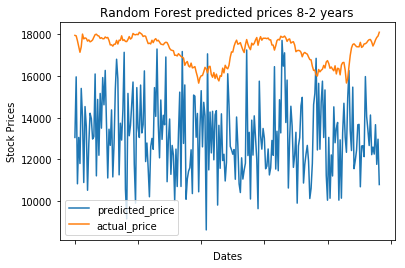

In [184]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
fig.savefig("random forest without smoothing.png")

In [185]:
test

,prices,compound,neg,neu,pos
2016-07-01,17949,-0.9982,0.212,0.728,0.061
2016-06-30,17929,-0.9976,0.201,0.741,0.057
2016-06-29,17694,-0.9979,0.231,0.688,0.081
2016-06-28,17409,-0.9666,0.136,0.765,0.099
2016-06-27,17140,-0.9793,0.158,0.754,0.088
2016-06-24,17400,-0.8881,0.093,0.856,0.051
2016-06-23,18011,-0.9866,0.155,0.756,0.089
2016-06-22,17780,-0.985,0.118,0.808,0.074
2016-06-21,17829,-0.9978,0.185,0.774,0.041
2016-06-20,17804,-0.9984,0.2,0.748,0.052


In [186]:
count = 0
total_test = 0
for index, row in test.iterrows():
    total_test += test.loc[index, 'prices']
    count += 1
average_test = total_test/count
print average_test

count = 0
total_predicted = 0
for index, row in predictions_df.iterrows():
    total_predicted += predictions_df.loc[index, 'prices']
    count += 1
average_predicted = total_predicted/count
print average_predicted

difference = average_test - average_predicted
print difference


    

17225
13109.22112554112
4115.77887445888


In [187]:
predictions_df['prices'] = predictions_df['prices'] + difference_test_predicted_prices
predictions_df

,prices
2016-07-01,18653.000000
2016-06-30,21557.450000
2016-06-29,16431.900000
2016-06-28,18652.600000
2016-06-27,17403.700000
2016-06-24,21003.300000
2016-06-23,19642.850000
2016-06-22,16493.400000
2016-06-21,20133.400000
2016-06-20,19189.525000


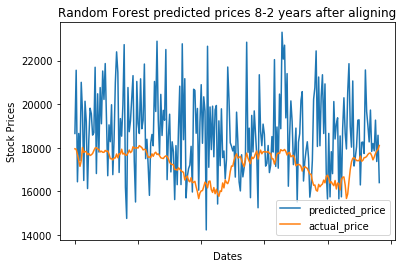

In [188]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years after aligning')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
fig.savefig("random forest with aligning.png")

In [189]:
predictions_df

,prices
2016-07-01,18653.000000
2016-06-30,21557.450000
2016-06-29,16431.900000
2016-06-28,18652.600000
2016-06-27,17403.700000
2016-06-24,21003.300000
2016-06-23,19642.850000
2016-06-22,16493.400000
2016-06-21,20133.400000
2016-06-20,19189.525000


In [190]:
predictions_df['ewma'] = predictions_df["prices"].ewm(span=60).mean()

In [191]:
predictions_df

,prices,ewma
2016-07-01,18653.000000,18653.000000
2016-06-30,21557.450000,20129.428750
2016-06-29,16431.900000,18855.611096
2016-06-28,18652.600000,18802.292965
2016-06-27,17403.700000,18503.621000
2016-06-24,21003.300000,18955.710003
2016-06-23,19642.850000,19063.956992
2016-06-22,16493.400000,18703.923033
2016-06-21,20133.400000,18884.739662
2016-06-20,19189.525000,18919.989348


In [192]:
predictions_df['actual_value'] = test['prices']
predictions_df['actual_value_ewma'] = predictions_df["actual_value"].ewm(span=60).mean()

In [193]:
predictions_df

,prices,ewma,actual_value,actual_value_ewma
2016-07-01,18653.000000,18653.000000,17949,17949.000000
2016-06-30,21557.450000,20129.428750,17929,17938.833333
2016-06-29,16431.900000,18855.611096,17694,17854.486992
2016-06-28,18652.600000,18802.292965,17409,17737.485831
2016-06-27,17403.700000,18503.621000,17140,17609.891691
2016-06-24,21003.300000,18955.710003,17400,17571.930927
2016-06-23,19642.850000,19063.956992,18011,17641.098645
2016-06-22,16493.400000,18703.923033,17780,17660.553263
2016-06-21,20133.400000,18884.739662,17829,17681.860337
2016-06-20,19189.525000,18919.989348,17804,17695.986294


In [194]:
predictions_df.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']

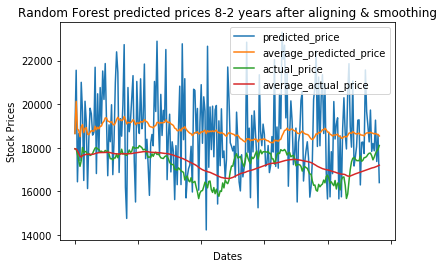

In [195]:
# Now plotting test predictions after smoothing
predictions_plot = predictions_df.plot(title='Random Forest predicted prices 8-2 years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig.savefig("random forest after smoothing.png")

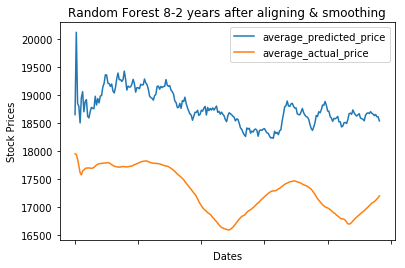

In [196]:

# Plotting just predict and actual average curves
predictions_df_average = predictions_df[['average_predicted_price', 'average_actual_price']]
predictions_plot = predictions_df_average.plot(title='Random Forest 8-2 years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig.savefig("random forest after smoothing 2.png")

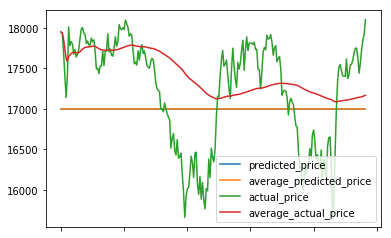

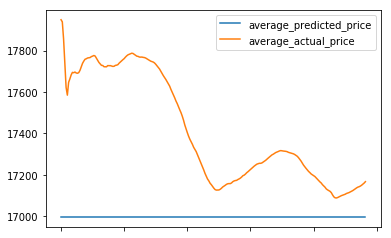

In [200]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

prediction_list = []

lr = LogisticRegression()
lr.fit(numpy_df_train, train['prices'])
    
prediction = lr.predict(numpy_df_test)
prediction_list.append(prediction)

idx = test.index.values

predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
predictions_df_list['prices'] = predictions_df_list['prices'] + difference
predictions_df_list

#Smoothing the plot
predictions_df_list['ewma'] = predictions_df_list["prices"].ewm(span=400).mean()
predictions_df_list['actual_value'] = test['prices']
predictions_df_list['actual_value_ewma'] =predictions_df_list["actual_value"].ewm(span=400).mean()

# Changing column names
predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
predictions_df_list.plot()
predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
predictions_df_list_average.plot()
    
#     predictions_df_list.show()